In [1]:
%pwd

'C:\\Users\\Nivya Sree\\social_media_analytics'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re


In [3]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

## O.1 Importing my data

In [4]:
nest=pd.read_csv('nestaway_reviews.csv',sep= ',')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

In [5]:
nest.head()

,ratings,reviews
0,1,"I am the owner given 10 flats to nestaway for 1 year, they made me to feel like am the big idiot who gave hard earned money to this people, they very good in giving false promises, they make very good money by cheating tenant as well as owner, no follow up simply rejecting your callif contin...Read More"
1,1,The services provided by Nestaway EC hub is not at all satisfactory.They asked me to visit the hub so that we can plan visit to multiple properties in EC.When I reached the center/hub none of the agents were available and when asked I was informed that agents are on emergency leave.T...Read More
2,1,Unprofessional and unorganized system. I am staying in a room in which the bathroom doesn't have a door. And they are not fixing it. One of the worst and unprofessional service provider. It's a fraud. Nestaway is charging users a lot of money. Don't choose their assured maintenance service. They...Read More
3,1,"NestAway Nestaway Gurgaon Is the Fraud company, they have eaten up my all security deposit of 15000/- at the time of moveout. NestAway imposed 29000/- of electricity bill on my dashboard for a single room in double sharing basis.(Means approx 60000/-) for one room for 6 months. And they said, th...Read More"
4,1,HORRIBLE EXPPERIENCE WITH NEST AWAY.AS AN OWNER I DECIDED TO TIE UP WITH THESE PEOPLE.AFTER AGREEMENT I HAD DONE ALL FORMALITIES AND HANDOVER THE KEYS TO THE SALES PERSON.THEREAFTER THESE GUYS STOPPED RESPONDING.THEY DID NOT ATTENDED MY CALLS.I CALLED SEVERAL TIMES TO HEAD OFFICE AND MADE COMPLA...Read More


In [6]:
nest['ratings'].value_counts()

1    304
5    38 
4    38 
Name: ratings, dtype: int64

In [7]:
nest.shape

(380, 2)

## 0.2 Trying to understand the % of ratings

In [8]:
(nest['ratings'].value_counts()/nest.shape[0])*100

1    80.0
5    10.0
4    10.0
Name: ratings, dtype: float64

In [9]:
def getLength(message):
    message_token=message.split(" ") #taking the length of the words 
    return len(message_token)

In [10]:
nest['length_of_message']=nest['reviews'].apply(lambda message: getLength(message))

In [11]:
nest.head()

,ratings,reviews,length_of_message
0,1,"I am the owner given 10 flats to nestaway for 1 year, they made me to feel like am the big idiot who gave hard earned money to this people, they very good in giving false promises, they make very good money by cheating tenant as well as owner, no follow up simply rejecting your callif contin...Read More",102
1,1,The services provided by Nestaway EC hub is not at all satisfactory.They asked me to visit the hub so that we can plan visit to multiple properties in EC.When I reached the center/hub none of the agents were available and when asked I was informed that agents are on emergency leave.T...Read More,96
2,1,Unprofessional and unorganized system. I am staying in a room in which the bathroom doesn't have a door. And they are not fixing it. One of the worst and unprofessional service provider. It's a fraud. Nestaway is charging users a lot of money. Don't choose their assured maintenance service. They...Read More,95
3,1,"NestAway Nestaway Gurgaon Is the Fraud company, they have eaten up my all security deposit of 15000/- at the time of moveout. NestAway imposed 29000/- of electricity bill on my dashboard for a single room in double sharing basis.(Means approx 60000/-) for one room for 6 months. And they said, th...Read More",96
4,1,HORRIBLE EXPPERIENCE WITH NEST AWAY.AS AN OWNER I DECIDED TO TIE UP WITH THESE PEOPLE.AFTER AGREEMENT I HAD DONE ALL FORMALITIES AND HANDOVER THE KEYS TO THE SALES PERSON.THEREAFTER THESE GUYS STOPPED RESPONDING.THEY DID NOT ATTENDED MY CALLS.I CALLED SEVERAL TIMES TO HEAD OFFICE AND MADE COMPLA...Read More,92


## creating a function for cleaning by using tokenisation

This helps me to perform word cloud

In [12]:
def clean_text(text):
    Stopwords=stopwords.words('english')
    test_line=text
    test_line_cleaned="".join([x for x in test_line if x not in string.punctuation])
    test_line_cleaned=test_line_cleaned.lower()
    test_tokens=test_line_cleaned.split(" ")
    test_tokens=[token for token in test_tokens if token not in Stopwords]
    ps = Stemmer() 
    test_line_cleaned=" ".join([ps.stem(token) for token in test_tokens])
    return test_line_cleaned

In [13]:
nest['cleaned_message']=nest['reviews'].apply(lambda message: clean_text(message))

In [14]:
nest.head()

,ratings,reviews,length_of_message,cleaned_message
0,1,"I am the owner given 10 flats to nestaway for 1 year, they made me to feel like am the big idiot who gave hard earned money to this people, they very good in giving false promises, they make very good money by cheating tenant as well as owner, no follow up simply rejecting your callif contin...Read More",102,owner given 10 flat nestaway 1 year made feel like big idiot gave hard earn money peopl good give fals promis make good money cheat tenant well owner follow simpli reject callif continread
1,1,The services provided by Nestaway EC hub is not at all satisfactory.They asked me to visit the hub so that we can plan visit to multiple properties in EC.When I reached the center/hub none of the agents were available and when asked I was informed that agents are on emergency leave.T...Read More,96,servic provid nestaway ec hub satisfactorythey ask visit hub plan visit multipl properti ecwhen reach centerhub none agent avail ask inform agent emerg leavetread
2,1,Unprofessional and unorganized system. I am staying in a room in which the bathroom doesn't have a door. And they are not fixing it. One of the worst and unprofessional service provider. It's a fraud. Nestaway is charging users a lot of money. Don't choose their assured maintenance service. They...Read More,95,unprofession unorgan system stay room bathroom doesnt door fix one worst unprofession servic provid fraud nestaway charg user lot money dont choos assur mainten servic theyread
3,1,"NestAway Nestaway Gurgaon Is the Fraud company, they have eaten up my all security deposit of 15000/- at the time of moveout. NestAway imposed 29000/- of electricity bill on my dashboard for a single room in double sharing basis.(Means approx 60000/-) for one room for 6 months. And they said, th...Read More",96,nestaway nestaway gurgaon fraud compani eaten secur deposit 15000 time moveout nestaway impos 29000 electr bill dashboard singl room doubl share basismean approx 60000 one room 6 month said thread
4,1,HORRIBLE EXPPERIENCE WITH NEST AWAY.AS AN OWNER I DECIDED TO TIE UP WITH THESE PEOPLE.AFTER AGREEMENT I HAD DONE ALL FORMALITIES AND HANDOVER THE KEYS TO THE SALES PERSON.THEREAFTER THESE GUYS STOPPED RESPONDING.THEY DID NOT ATTENDED MY CALLS.I CALLED SEVERAL TIMES TO HEAD OFFICE AND MADE COMPLA...Read More,92,horribl expperi nest awaya owner decid tie peopleaft agreement done formal handov key sale personthereaft guy stop respondingthey attend callsi call sever time head offic made complaread


In [15]:
nest['cleaned_message']=nest['cleaned_message'].str.strip().str.lower().str.replace('(', '').str.replace(')', '').str.replace('\n','')

In [16]:
nest['ratings'].value_counts()

1    304
5    38 
4    38 
Name: ratings, dtype: int64

## Trying to make it in a word cloud

In [17]:
import os
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)

In [18]:
nest.columns

Index(['ratings', 'reviews', 'length_of_message', 'cleaned_message'], dtype='object')

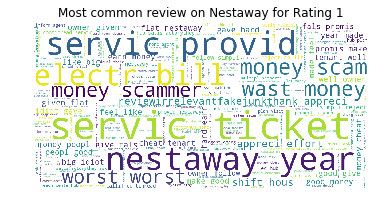

In [20]:
import numpy as np
from PIL import Image
%matplotlib inline
maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(nest.loc[nest['ratings']==1,'cleaned_message'].tolist()))

plt.title("Most common review on Nestaway for Rating 1")
plt.imshow(wordcloud)
wordcloud.to_file("nestaway_Bird.png")
plt.axis('off')
plt.show()

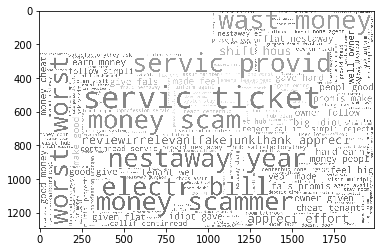

In [38]:
from wordcloud import ImageColorGenerator
text=" ".join(nest.loc[nest['ratings']==1,'cleaned_message'].tolist())
char_mask = np.array(Image.open("cloud.png"))   
image_colors = ImageColorGenerator(char_mask)
wc = WordCloud(background_color="white",  mask=char_mask, random_state=1).generate(text)# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))
wc.to_file("nestaway_Cloud.png")

As i didn't like the color i am removing the color

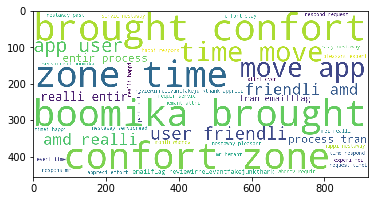

In [39]:
char_mask = np.array(Image.open("Bird.png"))   
text=" ".join(nest.loc[nest['ratings']==5,'cleaned_message'].tolist())
wc = WordCloud(background_color="white",  mask=char_mask).generate(text)# to recolour the image
plt.imshow(wc)
wc.to_file("nestaway_Bird3.png")

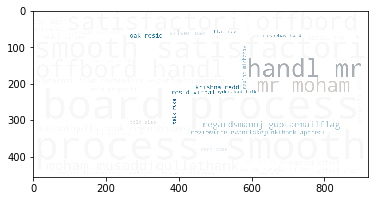

In [40]:

text=" ".join(nest.loc[nest['ratings']==4,'cleaned_message'].tolist())
char_mask = np.array(Image.open("Bird.png"))   
image_colors = ImageColorGenerator(char_mask)
wc = WordCloud(background_color="white",  mask=char_mask, random_state=1).generate(text)# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))
wc.to_file("nestaway_Bird.png")

In [ ]:

text4=" ".join(nest.loc[nest['ratings']==4,'cleaned_message'].tolist())
char_mask4 = np.array(Image.open("birdnest.png"))   
image_colors = ImageColorGenerator(char_mask4)
wc = WordCloud(background_color="white", max_words=1000, mask=char_mask4).generate(text4)# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))
wc.to_file("birdnest_cloud.png")

In [ ]:
%matplotlib inline
maskArray = np.array(Image.open("Bird1.png"))
wordcloud = WordCloud(stopwords=set(stopwords.words('english')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(nest.loc[nest['ratings']==4,'cleaned_message'].tolist()))

plt.title("Most common review on Nestaway for Rating 4")
plt.imshow(wordcloud)
wordcloud.to_file("nestaway_Bird4.png")
plt.axis('off')
plt.show()

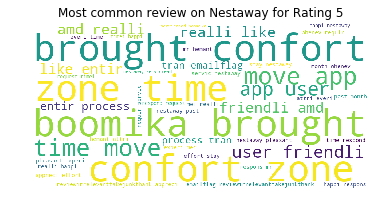

In [41]:
%matplotlib inline
maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(nest.loc[nest['ratings']==5,'cleaned_message'].tolist()))

plt.title("Most common review on Nestaway for Rating 5")
plt.imshow(wordcloud)
wordcloud.to_file("nestaway_Bird5.png")
plt.axis('off')
plt.show()

In [24]:
toke=nest['cleaned_message'][0]

In [29]:
token=nest["reviews"]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
print( vect.fit_transform(token).todense() )
print( vect.vocabulary_ )

[[1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
{'am': 23, 'the': 370, 'owner': 263, 'given': 160, '10': 0, 'flats': 146, 'to': 384, 'nestaway': 241, 'for': 149, 'year': 429, 'they': 377, 'made': 211, 'me': 218, 'feel': 139, 'like': 206, 'big': 58, 'idiot': 187, 'who': 423, 'gave': 158, 'hard': 174, 'earned': 119, 'money': 224, 'this': 379, 'people': 267, 'very': 404, 'good': 162, 'in': 190, 'giving': 161, 'false': 138, 'promises': 280, 'make': 215, 'by': 70, 'cheating': 83, 'tenant': 365, 'as': 38, 'well': 416, 'no': 242, 'follow': 147, 'up': 395, 'simply': 341, 'rejecting': 296, 'your': 431, 'callif': 73, 'contin': 97, 'read': 292, 'more': 227, 'services': 334, 'provided': 285, 'ec': 121, 'hub': 185, 'is': 194, 'not': 245, 'at': 42, 'all': 21, 'satisfactory': 319, 'asked': 40, 'visit': 406, 'so': 346, 'that': 369, 'we': 414, 'can': 75, 'plan': 272, 'multiple': 234, 'properties': 282, 'when': 419, 'reached': 291, 

In [33]:
type(vect.vocabulary_)

dict

In [34]:
import pandas as pd

df = pd.DataFrame(vect.vocabulary_.items(), columns=["word", "range"])

In [35]:
df

,word,range
0,am,23
1,the,370
2,owner,263
3,given,160
4,10,0
5,flats,146
6,to,384
7,nestaway,241
8,for,149
9,year,429


I think by seeing the data in the month of july in 2019 & september in 2018, customers has faced the problem 

Mostly users/ customers has faced "tanker" problem which is repeated more 

In most of the reviews hyderabad mainly #Madhapur are is being mentioned more and few are names like sliver oak residency, and names like murali, krishna, reddy, vitaal, rao,Mr. mohammed, murali krishna

In the token words it found that customers are not satisfied with the services given by nestaway and few have had some good experiances but the % is more towards dissatisfaction likely 76% and there was a complaint of "none of agents were avaliable", "worst service provider", "horrible experience with nestaway", "stopped responding", "review irrelevant fake junk thank you", "scammers", "stopped responding", "musaddiqullathanks", "regards manoj & gupta", "misbehaved", and mostly repeated words are #unprofessional and #unorganized system 
